# **Simple Linear Regression**


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from pathlib import Path

file_path = Path(r"C:\Users\KIIT0001\Downloads\housing_price_dataset.csv")
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset Shape: (5000, 6)

First few rows:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  

Column names:
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'P

In [14]:
target = "Price"
features = df.columns.drop(target)
results = []

for col in features:
    X = df[[col]]          # single feature
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Feature": col,
        "MSE": mse,
        "R2": r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find column with lowest MSE
best_feature = results_df.loc[results_df["MSE"].idxmin()]

print("Results for all single-feature models:\n")
print(results_df)

print("\nBest single predictor based on lowest MSE:")
print(best_feature)

Results for all single-feature models:

                        Feature           MSE        R2
0              Avg. Area Income  7.419489e+10  0.396949
1           Avg. Area House Age  9.643041e+10  0.216220
2     Avg. Area Number of Rooms  1.076665e+11  0.124893
3  Avg. Area Number of Bedrooms  1.205880e+11  0.019868
4               Area Population  1.018846e+11  0.171888

Best single predictor based on lowest MSE:
Feature    Avg. Area Income
MSE        74194887059.7397
R2                 0.396949
Name: 0, dtype: object


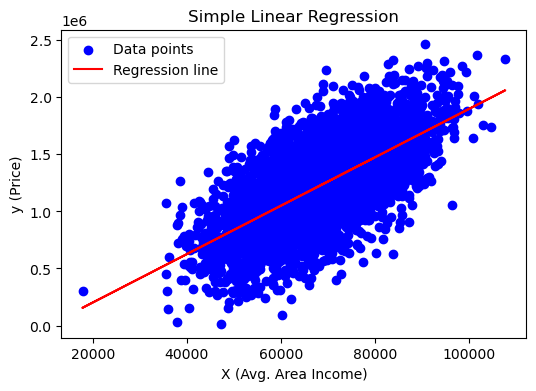

In [15]:
# Select a single feature for 2D plotting
X = df[['Avg. Area Income']]   # independent variable
y = df['Price']                # dependent variable

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate R^2 Score
r2 = r2_score(y, y_pred)

# Plotting the data points and the regression line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X (Avg. Area Income)')
plt.ylabel('y (Price)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()